## NAME - SANTRAM
## ROLL NO. -231030050
## Image Extraction and Traffic Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

###Read the annotation CSV file and find the number of unique object classes in the images

In [ ]:
#reading of annotation file
annotation_file=pd.read_csv('ques1_annotation.csv')
annotation_file

,filename,class,x,y,width,height
0,car_tent.jpg,tent,0,392,198,148
1,car_tent.jpg,car,294,372,375,151
2,dog.jpg,truck,473,71,216,101
3,dog.jpg,dog,134,219,179,324
4,dog.jpg,bicycle,125,129,446,293


In [ ]:
# finding of no. of unique objects class in two images
unique_object=annotation_file['class'].unique()
print('unique objects are:-\n',unique_object)
no_of_objects=len(unique_object)
print('no of unique objects are:-\n',no_of_objects)

unique objects are:-
 ['tent' 'car' 'truck' 'dog' 'bicycle']
no of unique objects are:-
 5


###Extract and save all objects from the images based on their positions

In [ ]:
images='/content'
#iterating through annotation row-wise
for index,row in annotation_file.iterrows():
  #storing filenames in image_id
  image_id=row['filename']
  #storing class data in objects
  object=row['class']

  x,y,width,height=row['x'],row['y'],row['width'],row['height']
  x_min,x_max=x,x+width
  y_min,y_max=y,y+height
  #joining image path
  image_path=os.path.join(images,image_id)
  image=Image.open(image_path)
  #function to crop image
  object_image=image.crop((x_min,y_min,x_max,y_max))
  #function image.save to combine each cropped image present in object_image with a unique index number and then save it as png extension
  # f here denotes formatted string
  object_image.save(f'{object_image}_{index}.png')

print('objects extracted and saved')

objects extracted and saved


###Display the "tent" object from "car_tent.jpg" and the "bicycle" object from "dog.jpg".

tent object is 
 AxesImage(size=(148, 198))


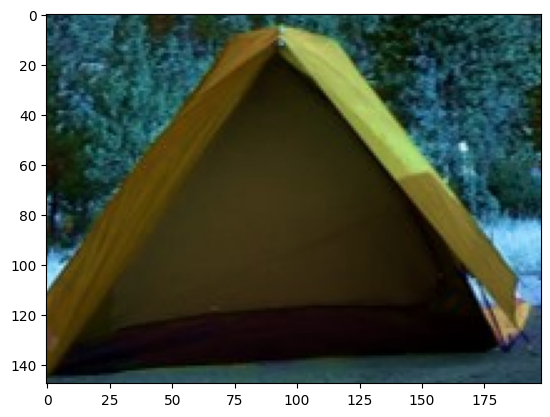

In [ ]:
# reading of car_tent.jpg image
image1=cv2.imread('car_tent.jpg')

# croping of tent from car_tent.jpg image
tent=image1[392:540,0:198]
print('tent object is \n',plt.imshow(tent))

bycycle object is 
 AxesImage(size=(293, 446))


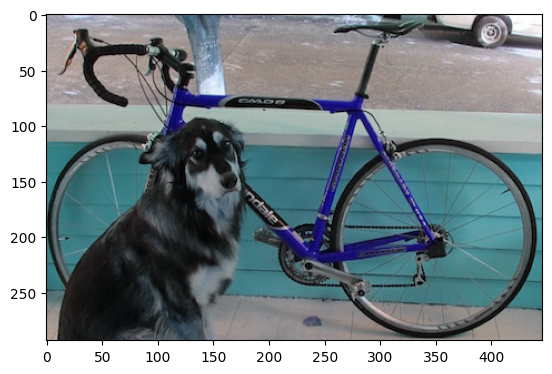

In [ ]:
# reading of dog.jpg image
image2=cv2.imread('dog.jpg')

# croping bycycle from dog.jpg image
bycycle=image2[129:422,125:571]
print('bycycle object is \n',plt.imshow(bycycle))

###Read and merge the data files "threshold_data.csv" and "segment_data.csv".n

In [ ]:
import pandas as pd

# Read the two CSV files into dataframes
data1 = pd.read_csv('threshold_data.csv')
data2 = pd.read_csv('segment_data.csv')

# Merge the dataframes based on the "Code" column
dframe= pd.merge(data1, data2, on='Code')
dframe



,Code,Time,Speed,Road,Direction,Mileage
0,5032426,0,55.00,I-235,EB,12.937880
1,5032426,1,43.00,I-235,EB,12.937880
2,5032426,2,42.75,I-235,EB,12.937880
3,5032426,3,53.00,I-235,EB,12.937880
4,5032426,100,46.00,I-235,EB,12.937880
...,...,...,...,...,...,...
6809,5033376,2203,59.00,I-235,EB,1.277982
6810,5033376,2300,55.75,I-235,EB,1.277982
6811,5033376,2301,57.00,I-235,EB,1.277982
6812,5033376,2302,44.00,I-235,EB,1.277982


###Modify threshold speed values in the merged dataframe.

In [ ]:
# Clip the "Threshold Speed" column to a minimum value of 0 and a maximum value of 45
dframe['Speed'] = dframe['Speed'].clip(lower=0, upper=45)

# Display the modified merged dataframe
dframe

,Code,Time,Speed,Road,Direction,Mileage
0,5032426,0,45.00,I-235,EB,12.937880
1,5032426,1,43.00,I-235,EB,12.937880
2,5032426,2,42.75,I-235,EB,12.937880
3,5032426,3,45.00,I-235,EB,12.937880
4,5032426,100,45.00,I-235,EB,12.937880
...,...,...,...,...,...,...
6809,5033376,2203,45.00,I-235,EB,1.277982
6810,5033376,2300,45.00,I-235,EB,1.277982
6811,5033376,2301,45.00,I-235,EB,1.277982
6812,5033376,2302,44.00,I-235,EB,1.277982


###Filter the merged dataframe for Road = ‘I-235’ and Direction = ‘WB’.

In [ ]:

# Filter the dataframe for Road = 'I-235' and Direction = 'WB'
dataframe= dframe[(dframe['Road'] == 'I-235') & (dframe['Direction'] == 'WB')]
dataframe


,Code,Time,Speed,Road,Direction,Mileage
96,5032428,0,45.0,I-235,WB,0.676521
97,5032428,1,45.0,I-235,WB,0.676521
98,5032428,2,45.0,I-235,WB,0.676521
99,5032428,3,45.0,I-235,WB,0.676521
100,5032428,100,45.0,I-235,WB,0.676521
...,...,...,...,...,...,...
6617,5033373,2203,45.0,I-235,WB,12.491597
6618,5033373,2300,35.5,I-235,WB,12.491597
6619,5033373,2301,45.0,I-235,WB,12.491597
6620,5033373,2302,45.0,I-235,WB,12.491597


###Pivot the filtered dataframe

In [ ]:
# inserting of Distance column on dataframe by the help of multiplying  Time and Threshold_speed
pivoted = dframe.pivot_table(index='Mileage', columns='Time', values='Speed')

# Sort the pivot table based on the distance (index)
pivoted = pivoted.sort_index()

# Display the sorted pivot table
pivoted

Time,0,1,2,3,100,101,102,103,200,201,...,2102,2103,2200,2201,2202,2203,2300,2301,2302,2303
Mileage,,,,,,,,,,,,,,,,,,,,,
0.000000,44.375,44.0,45.0,45.00,45.0,45.0,45.0,45.0,45.0,45.0,...,42.5,44.0,45.00,45.0,45.0,45.0,45.0,38.5,45.0,45.0
0.509586,45.000,40.0,45.0,44.25,45.0,45.0,45.0,45.0,45.0,45.0,...,45.0,45.0,45.00,45.0,42.0,45.0,45.0,45.0,45.0,45.0
0.676521,45.000,45.0,45.0,45.00,45.0,45.0,45.0,45.0,45.0,45.0,...,43.0,45.0,45.00,45.0,45.0,45.0,45.0,45.0,45.0,45.0
0.891268,35.000,29.0,45.0,45.00,0.0,45.0,0.0,45.0,45.0,45.0,...,45.0,45.0,45.00,45.0,45.0,45.0,45.0,45.0,42.0,45.0
1.277982,33.000,40.0,45.0,45.00,0.0,0.0,45.0,45.0,45.0,45.0,...,45.0,45.0,45.00,45.0,45.0,45.0,45.0,45.0,44.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13.112941,45.000,45.0,45.0,45.00,42.5,28.0,42.0,45.0,0.0,45.0,...,45.0,45.0,42.75,45.0,45.0,45.0,42.5,45.0,40.0,42.0
13.456991,45.000,45.0,45.0,45.00,45.0,36.0,42.0,45.0,43.5,43.0,...,38.5,45.0,45.00,45.0,45.0,45.0,37.0,45.0,33.0,45.0
13.656730,40.000,40.0,38.0,45.00,0.0,45.0,45.0,45.0,42.0,42.0,...,45.0,45.0,45.00,45.0,42.0,45.0,45.0,45.0,39.0,45.0


###Convert the pivoted dataframe into a matrix and plot it as an image.

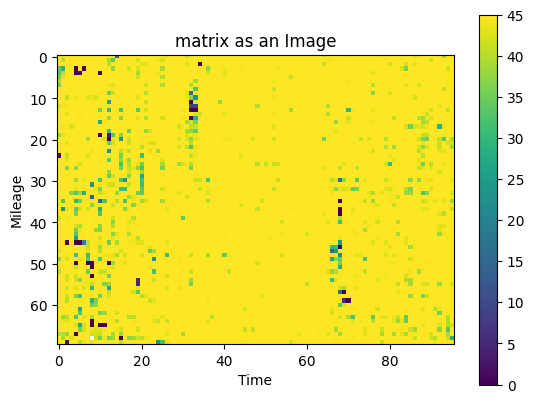

In [ ]:
# Convert pivot DataFrame to a matrix
matrix = pivoted.values

# Plot the matrix as an image
plt.imshow(matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('matrix as an Image')
plt.xlabel('Time')
plt.ylabel('Mileage')
plt.show()


### Apply medianBlur filter and plot the denoised image

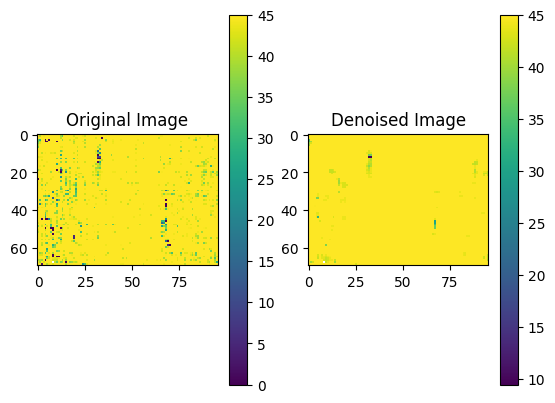

In [ ]:
# Convert pivot DataFrame to a matrix of float32 type
matrix = pivoted.values.astype(np.float32)

# Apply medianBlur filter with kernel window size 3
denoised_matrix = cv2.medianBlur(matrix, 3)

# Plot the denoised matrix as an image
plt.subplot(121)
plt.imshow(matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Original Image')

plt.subplot(122)
plt.imshow(denoised_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Denoised Image')
plt.show()
